In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')
import geopandas as gd

### Data uploading

In [2]:
## India Shape file
path = r"C:/Users/LENOVO/Documents/Diwali_Impact_coding/SpatialData/India_State_Shapefile/India_State_Boundary.shp"
gdf = gd.read_file(path)

In [3]:
## India data
data=pd.read_excel(r'C:/Users/LENOVO/Documents/Diwali_Impact_coding/Modelling/ModellingData_Type2.xlsx',usecols=['PM','Rank_PM','Cat_Rank','Type','State','City','Popu','Region','Site_TypeB','Station','Lat','Lon'])

### Data separation into Diwali (D) and NonDiwali (ND) category

In [4]:
data_type=data.groupby(['Type'])

In [5]:
D=data_type.get_group(('Diwali'))
ND=data_type.get_group(('NoNDiwali'))

In [6]:
lat = D['Lat'].tolist()      
long = D['Lon'].tolist()

In [7]:
# Data.shape # (274, 12)
D.head()

,PM,Rank_PM,Cat_Rank,Type,State,City,Popu,Region,Station,Site_TypeB,Lat,Lon
0,7.000000,1.0,WithinLimit,Diwali,Arunachal Pradesh,Naharlagun,SemiUrban,NorthEast,NaharlagunNaharlagunAPSPCB,Traffic,27.102185,93.679570
2,5.375000,1.0,WithinLimit,Diwali,Assam,Guwahati,Urban,NorthEast,IITGGuwahatiPCBA,Traffic,26.115792,91.708593
4,10.081818,1.0,WithinLimit,Diwali,Assam,Guwahati,Urban,NorthEast,PanBazaarGuwahatiPCBA,Traffic,26.185968,91.745364
6,9.825263,1.0,WithinLimit,Diwali,Assam,Guwahati,Urban,NorthEast,RailwayColonyGuwahatiPCBA,Traffic,26.179587,91.784315
8,6.822083,1.0,WithinLimit,Diwali,Assam,Sivasagar,SemiUrban,NorthEast,GirlsCollegeSivasagarPCBA,Residential,26.988134,94.633842


In [9]:
D.isna().sum()

PM            44
Rank_PM       44
Cat_Rank      44
Type           0
State          0
City           0
Popu           0
Region         0
Station        0
Site_TypeB     0
Lat            0
Lon            0
dtype: int64

In [12]:
D.dropna(subset=['PM'],inplace=True)
ND.dropna(subset=['PM'],inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
ND.isna().sum()

PM            0
Rank_PM       0
Cat_Rank      0
Type          0
State         0
City          0
Popu          0
Region        0
Station       0
Site_TypeB    0
Lat           0
Lon           0
dtype: int64

In [14]:
D.isna().sum()

PM            0
Rank_PM       0
Cat_Rank      0
Type          0
State         0
City          0
Popu          0
Region        0
Station       0
Site_TypeB    0
Lat           0
Lon           0
dtype: int64

### Plotting

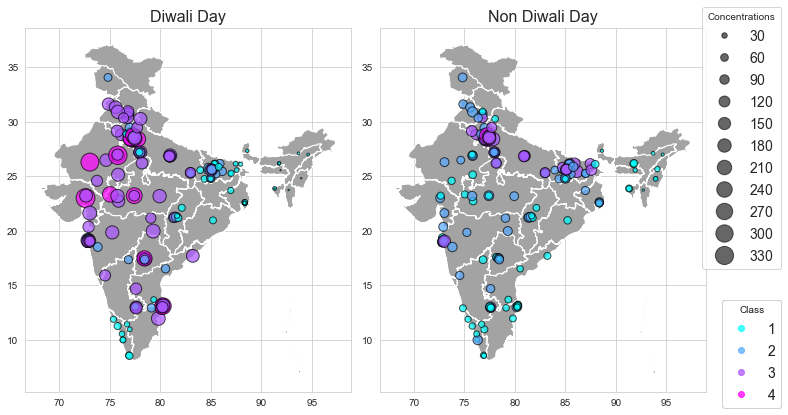

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1,2,figsize = (10,10)) # Figure and subplots

gdf.to_crs(epsg=4326).plot(ax=ax[0], color ="#A3A3A3") # Subplot 1
gdf.to_crs(epsg=4326).plot(ax=ax[1], color='#A3A3A3' ) # Subplot 2

x, y = (D['Lon'].values, D['Lat'].values)

scatter=ax[0].scatter('Lon','Lat', alpha=0.7, fc = 'white' , ec = 'black',c='Rank_PM',vmin=1, vmax=4, s='PM',data=D,cmap ="cool")# s-on which the size of circle is decided
ax[1].scatter('Lon','Lat', alpha=0.7, fc = 'white' , ec = 'black',c='Rank_PM',vmin=1, vmax=4, s='PM',data=ND,cmap ="cool")# s-on which the size of circle is decided

ax[0].set_title('Diwali Day',fontsize=16)
ax[1].set_title('Non Diwali Day',fontsize=16)
#kw=dict(prop ="colors",num = 4,  color = scatter.cmap(0.7),)

legend1 = fig.legend(*scatter.legend_elements(),
                    loc="right", bbox_to_anchor=(1.1, 0.3),title="Class",fontsize=14)#
fig.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.6), loc="right", title="Concentrations",fontsize=14)

#ax.set_title('Diwali Day')

plt.tight_layout()
plt.show()
plt.savefig('India.jpg')